## Get the data

In [ ]:
import pandas as pd

data = pd.read_csv("/content/train_clean.csv")
data.head()

,Unique ID,Type,Text,3.1.1,3.1.2,3.2.1,3.2.2,3.3.1,3.3.2,3.3.3,...,3.8.2,3.9.1,3.9.2,3.9.3,3.a.1,3.b.1,3.b.2,3.b.3,3.c.1,3.d.1
0,12555.0,Grant,Centers of Biomedical Research Excellence (COB...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14108.0,Grant,Research on Regenerative Medicine Introduction...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,23168.0,Organization,Catholic Health Association of India (CHAI): T...,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,219512.0,Contract,Quality Improvement Initiatives for Diabetes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,274093.0,Tender,Provision of Thalassemia Drugs and Disposables...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Labels distribution

<Axes: >

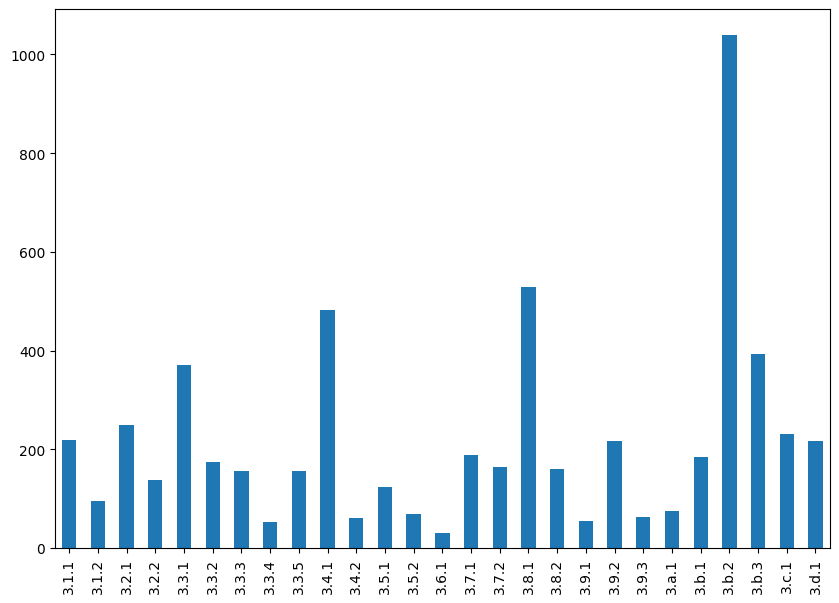

In [ ]:
import matplotlib.pyplot as plt

text_labels = data.iloc[:, 3:len(data.columns)]
labels_distribution = text_labels.sum()

plt.figure(figsize=(10,7))
labels_distribution.plot.bar()

In [ ]:
labels_distribution.index, labels_distribution.values

(Index(['3.1.1', '3.1.2', '3.2.1', '3.2.2', '3.3.1', '3.3.2', '3.3.3', '3.3.4',
        '3.3.5', '3.4.1', '3.4.2', '3.5.1', '3.5.2', '3.6.1', '3.7.1', '3.7.2',
        '3.8.1', '3.8.2', '3.9.1', '3.9.2', '3.9.3', '3.a.1', '3.b.1', '3.b.2',
        '3.b.3', '3.c.1', '3.d.1'],
       dtype='object'),
 array([ 218,   96,  249,  138,  371,  174,  157,   53,  156,  483,   61,
         123,   68,   31,  189,  165,  529,  161,   55,  217,   63,   76,
         185, 1040,  394,  232,  217]))

## the number of labels for each text

In [ ]:
import numpy as np

y = data.iloc[:, 3:len(data.columns)].to_numpy()
count_labels = [np.count_nonzero(y[i] == 1) for i in range(len(y))]

In [ ]:
count_labels[:10]

[2, 1, 4, 1, 2, 2, 3, 2, 1, 2]

<Axes: >

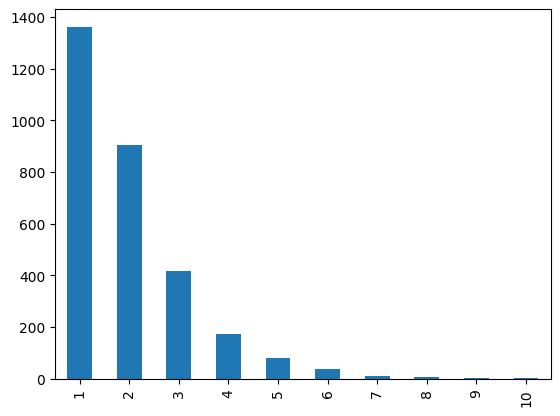

In [ ]:
data["total_labels"] = count_labels
data["total_labels"].value_counts().plot(kind='bar')

In [ ]:
# check total words in each text
data["total_words"] = data["Text"].apply(lambda n: len(n.split()))
data["total_words"].head(10)

0    398
1    305
2    304
3      5
4    514
5    470
6    307
7     12
8    217
9    381
Name: total_words, dtype: int64

In [ ]:
# get the average of total words
data["total_words"].max()

3753

## Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(data["Text"].to_numpy(),
                                                                            text_labels.to_numpy(),
                                                                            test_size = 0.2)

In [ ]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(2396, 599, 2396, 599)

In [ ]:
train_sentences[0]

'Health System Modernization (GPN); ; The Republic of Belarus has received financing in the amount of US$ 125 000 000 equivalent from the World Bank toward the cost of the Belarus Health System Modernization Project, and it intends to apply part of the proceeds to payments for goods, works, related services and consulting services to be procured under this project.; The project will include the following parts:    Part 1. Establishment of e-Health and Clinical Decision-support Systems        Integrated Health Management Information System:        Carrying out the following activities, inter alia:        the rehabilitation of selected Borrower&rsquo;s regional offices for housing IT-related infrastructure, including the preparation of the technical designs and the purchase of required equipment;    (i) the design and implementation of centralized e-health system for medical data exchange, including document registry and archive; (ii) the establishment of a medical information exchange p

In [ ]:
train_labels[0]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1])

## Converting text into numbers

### Text vectorization (Tokenization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Setup text vectorization variables (again)
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 3800 # max length our sequences will be (e.g. how many words from a tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = "int",
                                    output_sequence_length = max_length)

In [ ]:
# Fit the text vector to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
import random
# create a sample sentence and tokenize it

random_sentence = random.choice(train_sentences)

print(f"Original text:\n {random_sentence}\n")
print(f"Vectorized version:\n {text_vectorizer([random_sentence])}")

Original text:
 Building Systems and Institutional Capacity to Achieve Virtual Elimination of Human Immunodeficiency Virus (HIV) Overview    The Government of Cambodia has made significant progress in addressing HIV/AIDS for the past 25 years. In 2013, Cambodia announced its intent to eliminate new HIV infections by achieving the 90-90-90 targets by 2020 and 95-95-95 (and fewer than 300 new HIV infections annually) by 2025 &ndash; coming close to achieving an AIDS Free Generation. As of December 2016, Cambodia had diagnosed approximately 83% of the estimated population of PLHIV, placed 97% of diagnosed PLHIV on antiretroviral treatment (ART), and documented viral load (VL) suppression on 81% of PLHIV on ART. The existing PEPFAR strategy has helped to drive this progress, particularly in ensuring that PLHIV are placed on ART, retained in care, and receive quality-assured VL testing.    The greatest barrier to reaching 95-95-95 in Cambodia is finding undiagnosed cases of HIV. The failure

In [ ]:
# get unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()

top_5_words = words_in_vocab[:5]  # get the most common words
bottom_5_words = words_in_vocab[-5:] # get the least common words

print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words in vocab: {top_5_words}")
print(f"5 least common words in vocab: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words in vocab: ['', '[UNK]', 'the', 'and', 'of']
5 least common words in vocab: ['dar', 'dapivirine', 'dap', 'dangerous', 'danger']


### Embedding

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             embeddings_initializer = "uniform",
                             input_length = max_length)
embedding

In [ ]:
# embed the random sentence (turn it into dense vectors of fixed size)
print(f"Original text:\n {random_sentence}")
sample_embed = embedding(text_vectorizer([random_sentence]))
print(f"\nEmbedded Version:")
sample_embed

Original text:
 Building Systems and Institutional Capacity to Achieve Virtual Elimination of Human Immunodeficiency Virus (HIV) Overview    The Government of Cambodia has made significant progress in addressing HIV/AIDS for the past 25 years. In 2013, Cambodia announced its intent to eliminate new HIV infections by achieving the 90-90-90 targets by 2020 and 95-95-95 (and fewer than 300 new HIV infections annually) by 2025 &ndash; coming close to achieving an AIDS Free Generation. As of December 2016, Cambodia had diagnosed approximately 83% of the estimated population of PLHIV, placed 97% of diagnosed PLHIV on antiretroviral treatment (ART), and documented viral load (VL) suppression on 81% of PLHIV on ART. The existing PEPFAR strategy has helped to drive this progress, particularly in ensuring that PLHIV are placed on ART, retained in care, and receive quality-assured VL testing.    The greatest barrier to reaching 95-95-95 in Cambodia is finding undiagnosed cases of HIV. The failure

<tf.Tensor: shape=(1, 3800, 128), dtype=float32, numpy=
array([[[-0.03764622, -0.04530909, -0.03447007, ...,  0.04312837,
         -0.01280159,  0.00286818],
        [-0.0498122 , -0.00915681,  0.0202495 , ..., -0.0131884 ,
         -0.02197698, -0.0038722 ],
        [-0.01372384, -0.00344708, -0.00310079, ...,  0.03535142,
         -0.042721  , -0.02166333],
        ...,
        [ 0.00076681, -0.04256827, -0.00497036, ..., -0.0017774 ,
          0.03071913, -0.03058634],
        [ 0.00076681, -0.04256827, -0.00497036, ..., -0.0017774 ,
          0.03071913, -0.03058634],
        [ 0.00076681, -0.04256827, -0.00497036, ..., -0.0017774 ,
          0.03071913, -0.03058634]]], dtype=float32)>

### Creating learning rate reduction callback


In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                factor = 0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                patience = 2,
                                                verbose = 1,
                                                min_lr = 1e-7)

### Model 1

In [304]:
# build a model
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = "string")

x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64,
                  kernel_size = 5,
                  activation = "relu",
                  padding = "valid")(x)
x = layers.GlobalMaxPooling1D()(x)

outputs = layers.Dense(27, activation = "softmax")(x)
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_dense")

In [305]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_6 (TextV  (None, 3800)             0         
 ectorization)                                                   
                                                                 
 embedding_8 (Embedding)     (None, 3800, 128)         1280000   
                                                                 
 conv1d_28 (Conv1D)          (None, 3796, 64)          41024     
                                                                 
 global_max_pooling1d_20 (Gl  (None, 64)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_21 (Dense)            (None, 27)              

In [306]:
# compile the model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [307]:
# fit the model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs = 50,
                              validation_data = (val_sentences, val_labels))

Epoch 1/50
75/75 [==============================] - 50s 658ms/step - loss: 0.2982 - accuracy: 0.2120 - val_loss: 0.2010 - val_accuracy: 0.3356
Epoch 2/50
75/75 [==============================] - 50s 660ms/step - loss: 0.1874 - accuracy: 0.4232 - val_loss: 0.1732 - val_accuracy: 0.4391
Epoch 3/50
75/75 [==============================] - 49s 655ms/step - loss: 0.1550 - accuracy: 0.5338 - val_loss: 0.1557 - val_accuracy: 0.5543
Epoch 4/50
75/75 [==============================] - 49s 654ms/step - loss: 0.1307 - accuracy: 0.5914 - val_loss: 0.1452 - val_accuracy: 0.5609
Epoch 5/50
75/75 [==============================] - 50s 663ms/step - loss: 0.1121 - accuracy: 0.6306 - val_loss: 0.1405 - val_accuracy: 0.5643
Epoch 6/50
75/75 [==============================] - 49s 659ms/step - loss: 0.0965 - accuracy: 0.6565 - val_loss: 0.1379 - val_accuracy: 0.5676
Epoch 7/50
75/75 [==============================] - 49s 657ms/step - loss: 0.0828 - accuracy: 0.6736 - val_loss: 0.1372 - val_accuracy: 0.5876

In [308]:
model_1.evaluate(val_sentences, val_labels)

19/19 [==============================] - 4s 185ms/step - loss: 0.2512 - accuracy: 0.5726


[0.25120335817337036, 0.5726210474967957]

In [309]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:5]

19/19 [==============================] - 3s 152ms/step


array([[5.14338261e-09, 1.83406328e-12, 3.25237949e-12, 6.10958117e-10,
        6.91600166e-10, 5.65355718e-09, 4.21033768e-08, 5.98438743e-10,
        9.99770403e-01, 3.28162786e-09, 1.17313070e-09, 1.43876788e-09,
        3.72914100e-09, 3.21225784e-08, 1.33953432e-10, 1.46820600e-09,
        7.86984433e-09, 1.15818743e-10, 4.35465192e-10, 4.82606204e-08,
        6.99084179e-10, 1.31870653e-10, 5.23856569e-10, 2.10118873e-04,
        9.64571534e-10, 2.52463006e-09, 1.94664190e-05],
       [1.23345842e-06, 6.44222439e-07, 5.01669717e-07, 1.88526483e-09,
        7.12958645e-05, 8.75645796e-08, 1.59249032e-06, 9.60641700e-08,
        1.89350366e-08, 3.94234378e-09, 4.98301006e-07, 5.61183384e-08,
        7.04182455e-08, 9.22805896e-07, 7.34873829e-05, 7.61800084e-06,
        1.72396540e-05, 4.05106739e-08, 2.28405682e-07, 9.99812603e-01,
        1.77547554e-06, 1.80589463e-08, 7.06514675e-06, 3.21338289e-10,
        1.90643107e-07, 9.71715224e-08, 2.82619203e-06],
       [2.00460654e-05

In [310]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:5]

<tf.Tensor: shape=(5, 27), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [311]:
# calculate hamming loss
from sklearn.metrics import hamming_loss
hamming_loss(y_true = val_labels,
             y_pred = model_1_preds)

0.05076361837630619

## Prepare for the submission

In [312]:
submission_data = pd.read_csv("Devex_test_questions.csv", encoding='latin-1')
submission_data.head()

,Unique ID,Text,3.1.1,3.1.2,3.2.1,3.2.2,3.3.1,3.3.2,3.3.3,3.3.4,...,3.8.2,3.9.1,3.9.2,3.9.3,3.a.1,3.b.1,3.b.2,3.b.3,3.c.1,3.d.1
0,49848,4th Sector Health: <p>4th Sector Health is a U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52348,Action for Global Health: <p>Action for Global...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103541,Scottish Association for Mental Health (SAMH):...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52382,Singapore Immunology Network: <p>The Singapore...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47212,Coastal Conservation and Education Foundation ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean the submission data

In [313]:
import re

cleanr = re.compile('<.*?>')

def remove_html(raw_html):
    cleantext = re.sub(cleanr, '', raw_html)
    cleantext = re.sub('&nbsp;', ' ', cleantext)
    cleantext = re.sub('&bull;', ' ', cleantext)
    return cleantext

In [314]:
submission_data["Text"] = submission_data["Text"].apply(remove_html)

In [315]:
submission_data.head()

,Unique ID,Text,3.1.1,3.1.2,3.2.1,3.2.2,3.3.1,3.3.2,3.3.3,3.3.4,...,3.8.2,3.9.1,3.9.2,3.9.3,3.a.1,3.b.1,3.b.2,3.b.3,3.c.1,3.d.1
0,49848,4th Sector Health: 4th Sector Health is a USAI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52348,Action for Global Health: Action for Global He...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103541,Scottish Association for Mental Health (SAMH):...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52382,Singapore Immunology Network: The Singapore Im...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47212,Coastal Conservation and Education Foundation ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Predict for the submission

In [316]:
# create prediction labels
submission_pred_probs = model_1.predict(submission_data["Text"].to_numpy())
submission_preds = tf.squeeze(tf.round(submission_pred_probs))

32/32 [==============================] - 5s 170ms/step


In [317]:
# put the predicted labels to the submission_data
submission_data.iloc[:, 2:len(submission_data.columns)] = submission_preds

In [318]:
# remove "Text" column
submission_data = submission_data.drop('Text', axis=1)

In [319]:
# saving as CSV
submission_data.to_csv('submission_completed.csv', index=False, encoding='utf-8')

In [320]:
# download the submission file
from google.colab import files
files.download("submission_completed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>